# Examples of module usage

## Simple Distillation design

8.476170817419497


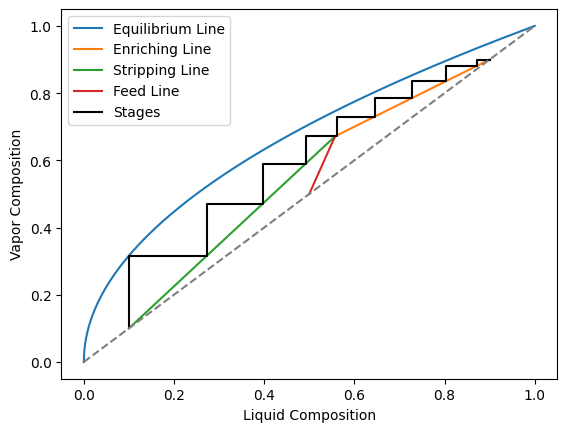

In [1]:
# Define compositions
x_F = 0.5
x_D = 0.9
x_W = 0.1

# define a function that describes x/y equilibrium
from numpy import sqrt
f = lambda x: sqrt(x)

# Create the equilibrium line
from binary_distillation.specifications import BinaryVaporLiquidEquilibriumLine
eq = BinaryVaporLiquidEquilibriumLine(f)

# Create the operating line
from binary_distillation.specifications import BinaryDistillationOperatingLine
op = BinaryDistillationOperatingLine(x_F, x_D, x_W, eq, 1.5, R=2)

# Perform a stage analysis
from binary_distillation.stages import step_off_bottom
stages = step_off_bottom(op, eq, E=0.75)

# Plot the results
from binary_distillation.stages import plot_mccabe_thiele_analysis
plot_mccabe_thiele_analysis(eq, op, stages, op_lines="both")
from matplotlib.pyplot import legend
legend()
print(stages.N)

## Defining equilibrium lines from data

In [2]:
# Define the x/y data in two arrays
from numpy import array
x = array([0, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.94, 0.96, 0.98, 1])
y = array([0, 0.192, 0.377, 0.527, 0.656, 0.713, 0.746, 0.771, 0.794, 0.822, 0.858, 0.912, 0.942, 0.959, 0.978, 1])

# Define the equilibrium curve using the data
from binary_distillation.specifications import BinaryVaporLiquidEquilibriumLine
eq = BinaryVaporLiquidEquilibriumLine(x, y)

# Optionally fit the data to a curve
eq.fit_curve()
# Note: fit_curve() replaces the x/y data

## Using the NRTL solver

In [3]:
# Define the Antoine's constants
from binary_distillation.thermodynamics.vle import AntoineParameters
A = AntoineParameters(16.5785, 3638.27, 239.500)
B = AntoineParameters(16.3872, 3885.70, 230.170)

# Define an NRTL system
b_12 = -253.88
b_21 = 845.21
alpha = 0.2994
from binary_distillation.thermodynamics.nrtl import BinaryNRTLParameters
sys = BinaryNRTLParameters(A, B, b_12, b_21, alpha)

# Create an equilibrium line from the NRTL system
eq = sys.equilibrium_line(101.325)
# Note: there is no need to fit an equation to this equilibrium line as it already has an associated function.